<a href="https://colab.research.google.com/github/Bha89-art/UNOVotingPrediction/blob/main/Copy_of_UNOVotingPrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/un_voting_data0.csv')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import joblib  # Not sure if I'll need this, but let's import it just in case


In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('un_voting_data0.csv')
df

,UNO Topics,China,France,Russia,UK,USA,Year
0,North Korea Nuclear Program,abstained,no,no,yes,yes,2017
1,Syrian Civil War,no,yes,yes,yes,abstained,2016
2,Russian Annexation of Crimea,abstained,abstained,yes,yes,no,2014
3,Global Terrorism,yes,no,abstained,yes,yes,2015
4,Humanitarian Aid to Yemen,yes,abstained,yes,no,no,2020
5,LGBTQ Rights,no,yes,no,abstained,abstained,2019
6,PeaceKeeping Mission in South Sudan,yes,yes,abstained,no,yes,2018
7,Israeli Settlements in the West Bank,no,yes,no,yes,abstained,2021
8,Venzulean Political Crisis,abstained,yes,yes,no,no,2020
9,Climate Change Agreement (Paris Agreement),yes,no,no,abstained,yes,2016


In [ ]:
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['UNO Topics', 'China', 'France', 'Russia', 'UK', 'USA', 'Year'], dtype='object')


In [ ]:
# Step 2: Data Cleaning
# Convert vote values to numeric: abstained=0, no=-1, yes=1
vote_mapping = {'abstained': 0, 'no': -1, 'yes': 1}
for country in ['China', 'France', 'Russia', 'UK', 'USA']:
    if country in data.columns:
        data[country] = data[country].map(vote_mapping)
    else:
        print(f"Warning: Column {country} not found in the dataset..")



In [ ]:
# Check for missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns


In [ ]:
# Impute missing values
# Numeric columns: fill with mean (I read that this is common)
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Categorical columns: fill with the most frequent value (
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

print("Number of NaN values after processing:", data.isna().sum().sum())


Number of NaN values after processing: 0


In [ ]:
# Step 3: Feature Engineering - Create new features
# Create an average vote feature from selected countries
if all(col in data.columns for col in ['China', 'France', 'Russia', 'UK']):
    data['Average_Vote'] = data[['China', 'France', 'Russia', 'UK']].mean(axis=1)
else:
    print("Warning: Some columns needed for Average_Vote are missing. Skipping this step.")


In [ ]:
# Step 4: Time-Series Analysis
if 'Year' in data.columns:
    if data['Year'].dtype != 'int64':  # Check if Year is a number
        data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert it just in case

    time_series_data = data.groupby('Year').mean(numeric_only=True).reset_index()
else:
    print("Warning: 'Year' column not found in the dataset.")
    time_series_data = pd.DataFrame()  # Empty DataFrame for visualization



Model: Logistic Regression
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         0.0       0.33      1.00      0.50         1
         1.0       0.80      0.80      0.80         5

    accuracy                           0.62         8
   macro avg       0.38      0.60      0.43         8
weighted avg       0.54      0.62      0.56         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


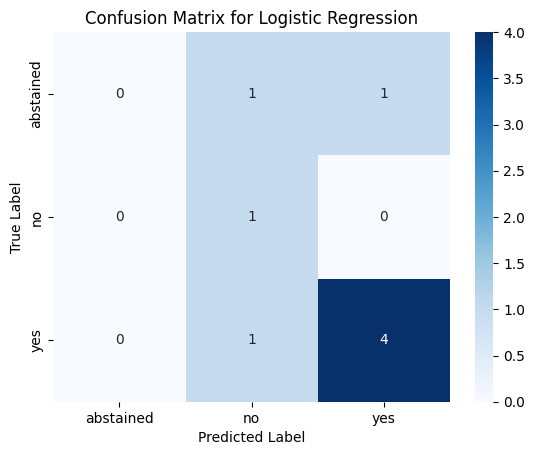

Feature importance not available for Logistic Regression.

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         0.0       0.00      0.00      0.00         1
         1.0       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.61      0.67      0.64         8
weighted avg       0.77      0.88      0.82         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


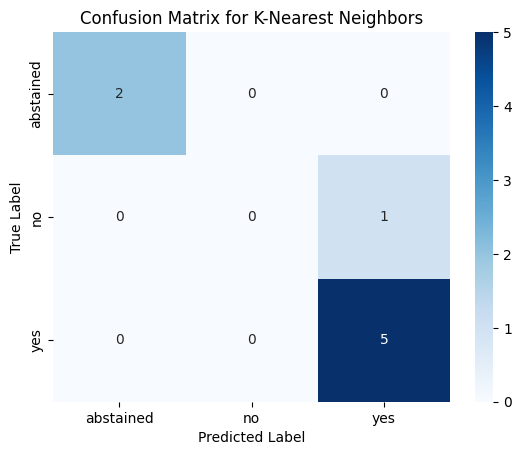

Feature importance not available for K-Nearest Neighbors.

Model: Support Vector Machine
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         0.0       0.00      0.00      0.00         1
         1.0       0.71      1.00      0.83         5

    accuracy                           0.62         8
   macro avg       0.24      0.33      0.28         8
weighted avg       0.45      0.62      0.52         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


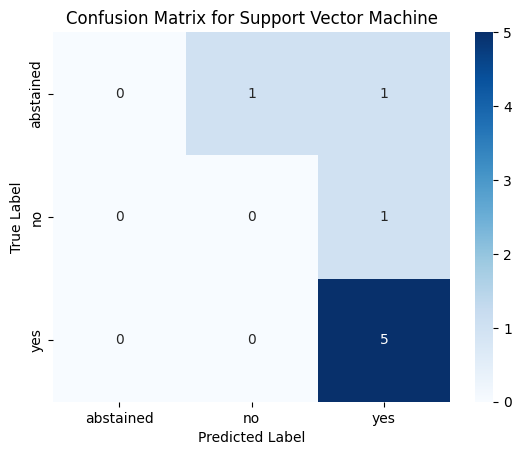

Feature importance not available for Support Vector Machine.

Model: Random Forest
              precision    recall  f1-score   support

        -1.0       1.00      0.50      0.67         2
         0.0       0.33      1.00      0.50         1
         1.0       1.00      0.80      0.89         5

    accuracy                           0.75         8
   macro avg       0.78      0.77      0.69         8
weighted avg       0.92      0.75      0.78         8



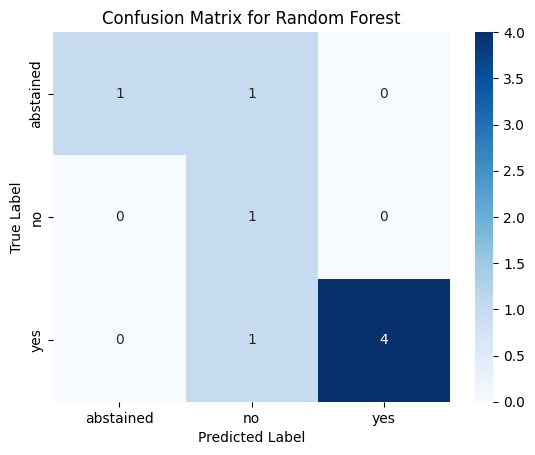

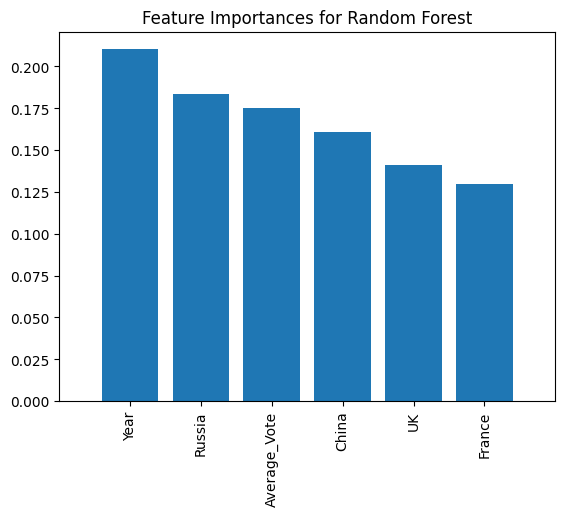


Model: Gradient Boosting
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2
         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.83      0.93      0.85         8
weighted avg       0.94      0.88      0.89         8



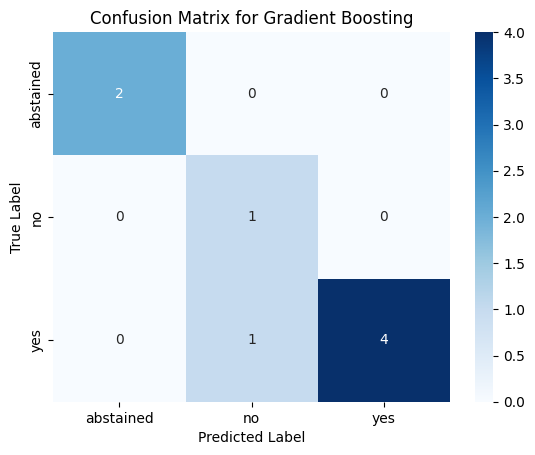

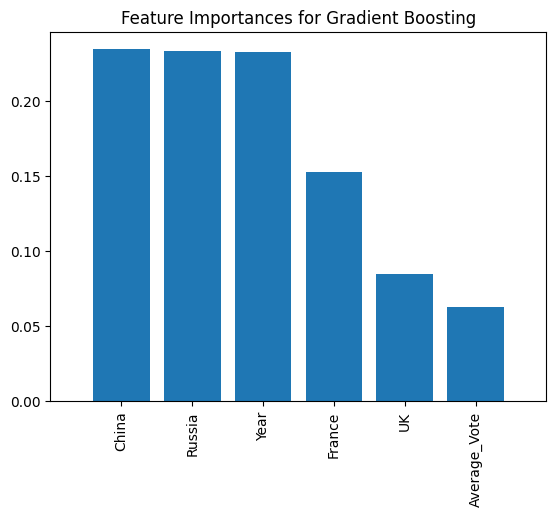

In [ ]:
# Step 5: Classification and Clustering - This part is tricky!
if 'USA' in data.columns:
    X = data.drop(['USA', 'UNO Topics'], axis=1, errors='ignore')  # Ignore errors just in case
    y = data['USA']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize models (not sure if I should use all of these, but let's try)
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }

    # Train and evaluate each model - this might take a while
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Scale data first
            ('model', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on test data
        y_pred = pipeline.predict(X_test)
        # Print evaluation metrics
        print(f"\nModel: {model_name}")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix - Hope this works
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(vote_mapping.keys()), yticklabels=sorted(vote_mapping.keys()))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Feature Importance (only for models that support it)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            plt.figure()
            plt.title(f"Feature Importances for {model_name}")
            plt.bar(range(X.shape[1]), importances[indices], align="center")
            plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
            plt.xlim([-1, X.shape[1]])
            plt.show()
        else:
            print(f"Feature importance not available for {model_name}.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


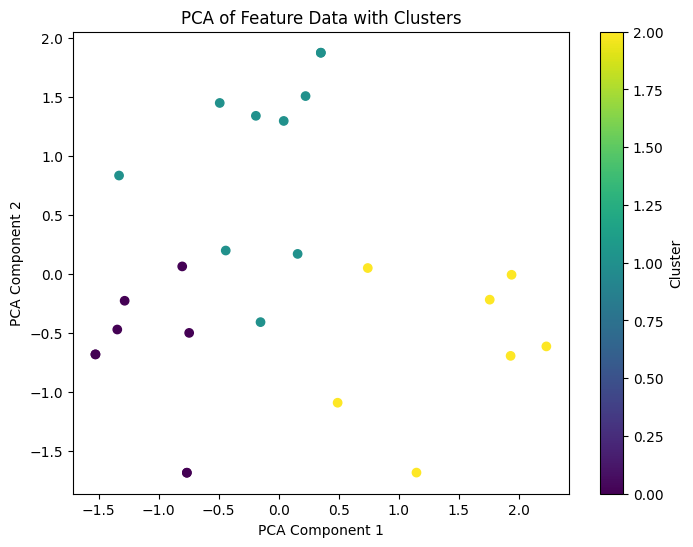

In [ ]:
# Step 6: PCA and KMeans Clustering - Let's see how this works!
pca = PCA(n_components=2)
X = data.drop(['UNO Topics', 'Year'], axis=1, errors='ignore')  # Exclude non-numeric columns
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)  # Just picking 3 clusters, not sure if that's right
clusters = kmeans.fit_predict(X)

# Plot PCA results with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA of Feature Data with Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Interactive Visualization with Plotly - This part is fun!
if not time_series_data.empty:
    fig = px.line(time_series_data, x='Year', y=['China', 'France', 'Russia', 'UK'], title='Voting Patterns Over Time')
    fig.update_layout(xaxis_title='Year', yaxis_title='Average Vote')
    fig.show()
else:
    print("No data available for time-series visualization.")